# Building the Data Set

## The Project: Cera or Eisenberg?

This notebook creates a data set for training a
deep learning algorithm to differentiate between
Michael Cera and Jesse Eisenberg.

This process is is based on [the notebook](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) from Fastai's
[_Practical Deep Learning for Coders, v3_](https://course.fast.ai/) course.


In [4]:
from fastai.vision import *

## The Process

Repeat for each class (Cera, Eisenberg):

* Search Google Images for images of the celebrity
* Run this in the web browser's console when viewing
  images:
  ```
  urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
  window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
  ```
* Create a directory path for the images of the celebrity
* Download the images to the directory
* Remove images that can't be opened
* Quickly train a model.
* Use this to find the images it has the hardest time
  recognising.
* Remove these using the Delete Widget

In [18]:
path = Path('./images')
classes = ['cera', 'eisenberg']

# Michael Cera

* Google Image results from `michael cera -aubrey -jesse -hill -nadine` (Removing names of poeple who seemed to be commonly associated with him).

In [13]:
folder = 'cera'
url_file = 'cera-urls'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [14]:
download_images(path/url_file, dest, max_pics=200)

# Jesse Eisenberg
Search query: `jesse eisenberg -cera`

In [15]:
folder = 'eisenberg'
url_file = 'eisenberg-urls'
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [16]:
download_images(path/url_file, dest, max_pics=200)

# Data Cleaning

## Remove invalid files

In [19]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cera


eisenberg


## View data

In [20]:
# Specify seed to ensure we always 
# use the same validation set.
np.random.seed(0)
data = ImageDataBunch.from_folder(
    path, train=".", valid_pct=0.2,
    ds_tfms=get_transforms(), size=224,
    num_workers=4
).normalize(imagenet_stats)

In [21]:
assert data.classes == classes

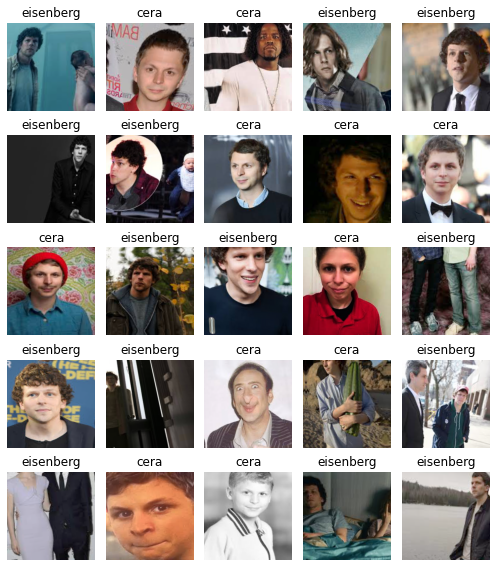

In [22]:
data.show_batch(figsize=(7, 8))